In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
ds = xr.open_dataset('NC_H08_20161117_0230_B01_JP02_R10.nc')
ds

<xarray.Dataset> Size: 36MB
Dimensions:     (latitude: 2701, longitude: 3301)
Coordinates:
  * latitude    (latitude) float32 11kB 48.5 48.49 48.48 ... 21.52 21.51 21.5
  * longitude   (longitude) float32 13kB 119.0 119.0 119.0 ... 152.0 152.0 152.0
Data variables:
    albedo      (latitude, longitude) float32 36MB ...
    start_time  datetime64[ns] 8B ...
    end_time    datetime64[ns] 8B ...
Attributes:
    title:        Himawari-8 band-1 ALBEDO
    institution:  MSC/JMA
    source:       Himawari-8 satellite observation
    history:      at 05:06:59 03/16/2017: file created. NC_H08_20161117_0230_...
    Conventions:  CF-1.4

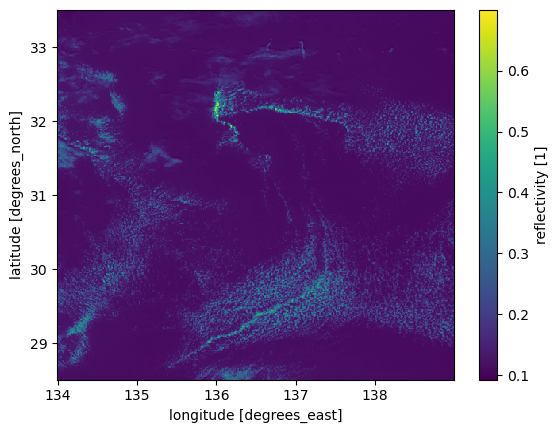

In [3]:
data = ds['albedo'][1500:2000,1500:2000]
data.plot()

In [4]:
lat1d = data.latitude
lon1d = data.longitude
lon_grid, lat_grid = np.meshgrid(lon1d, lat1d)

Text(0.5, 1.0, 'Himawari')

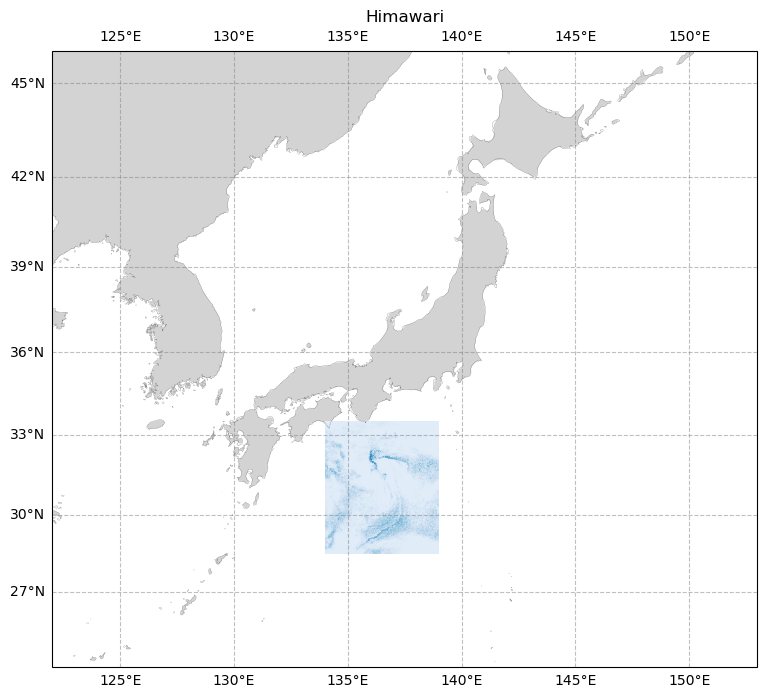

In [5]:
fig = plt.figure(figsize=(10, 8))

# Define the map projection as Mercator, with a central longitude of 180 degrees
projection = ccrs.Mercator(central_longitude=180)

ax = plt.axes(projection=projection)
levels = np.arange(0, 1, 0.01)  # Pressure levels in hPa
contourf = ax.contourf(lon_grid, lat_grid, 
                       data, 
                       levels=levels, 
                       cmap="Blues", 
                       transform=ccrs.PlateCarree())

#=====
# Add coastlines and other geographic features for reference
ax.coastlines(resolution='10m', lw=.1)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='none')

# Add gridlines and only show longitude labels
gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)
gl.top_labels = True  # Turn off top labels
gl.bottom_labels = True  # Show bottom labels (longitude)
gl.left_labels = True  # Turn off left labels (latitude)
gl.right_labels = False # Turn off right labels
gl.xlabel_style = {'size': 10, 'color': 'black'}

# Set extent to cover Japan [longitude_min, longitude_max, latitude_min, latitude_max]
ax.set_extent([122, 153, 24, 46], crs=ccrs.PlateCarree())

# Add title for the plot
plt.title("Himawari")

#plt.savefig('humidity.png', dpi=100)
